# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

Primero debemos importar pandas para poder leer cada archivo csv. Luego crearemos variables para cada lectura de cada archivo, al leer los archivos, hay que verificar si es necesario el armento sep= para determinar el delimitador entre los valores de cada columna. Posteriormente, se usará info() para conocer información general de cada DataFrame. Finalmente, se mostrarán las primeras filas de cada DataFrame para verificar que se leyeron correctamente los archivos.

In [1]:
# importar librerías
import pandas as pd

In [2]:
# leer conjuntos de datos en los DataFrames
instacart_orders= pd.read_csv('/datasets/instacart_orders.csv',sep=";")
products= pd.read_csv('/datasets/products.csv',sep=";")
order_products= pd.read_csv('/datasets/order_products.csv',sep=";")
aisles= pd.read_csv('/datasets/aisles.csv',sep=";")
departments= pd.read_csv('/datasets/departments.csv',sep=";")

In [3]:
# mostrar información del DataFrame
instacart_orders.info()
print()
print(instacart_orders.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB

   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12  

In [4]:
# mostrar información del DataFrame
products.info()
print()
print(products.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB

   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  


In [5]:
# mostrar información del DataFrame
order_products.info(show_counts=True)
print()
print(order_products.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB

   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1


In [6]:
# mostrar información del DataFrame
aisles.info()
print()
print(aisles.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB

   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation


In [7]:
# mostrar información del DataFrame
departments.info()
print()
print(departments.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes

   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.


Al mostrar la información general para cada DataFrame con el método info(), sin especificar un delimitador de columnas en la lectura de cada dataframe,  se pudo observar que no estaban específicadas. Por lo tanto, se usó el parámetro sep= ";" para especificar cada columna. El elemento separador ";" lo proporcionó el método info() inicialmente, cuando no estaba el parámetro sep=. También se puede observar que hay datos ausentes en los DataFrames de instacart_orders, products y order_products. En este último, al tener demasiadas filas, se utilizó el parámetro show_counts=True para que mostrara los elementos no nulos, debido a que info() no los imprime por defecto cuando se tienen muchas filas. Finalmente, se mostraron las primeras filas de cada DataFrame para tener una visión de los datos.

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

Para verificar y corregir los tipos de datos se debe:
- Revisar cada DataFrame para asegurarse de que los tipos de datos de las columnas sean los adecuados.
- Específicamente, asegurarse de que las columnas de ID sean del tipo entero para facilitar su manipulación.
- Utilizar el método astype() para convertir las columnas al tipo correcto si es necesario.

Se puede omitir este paso, poque previamente cuando llamamos a info() ya todas las columnas de ID estaban en entero (int64)

Para la identificación y tratamiento de valores ausentes:

- Examinar cada DataFrame para identificar columnas con valores ausentes.
- Determinar la mejor estrategia para tratar los valores ausentes.
- Utilizar métodos como isnull(), fillna() y dropna() para manejar los valores ausentes de manera adecuada.

Para la identificar y eliminar valores duplicados:

- Revisar cada DataFrame en busca de filas totalmente duplicadas o IDs duplicados.
- Utilizar los métodos duplicated() y drop_duplicates() para eliminar los valores duplicados según sea necesario.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
print(instacart_orders[instacart_orders.duplicated()])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48          3 

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

Sí hay líneas duplicadas, lo que tienen en común es que son pedidos que fueron realizados el miércoles a las 2:00 a.m.

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
print(instacart_orders[(instacart_orders['order_dow'] == 3) & (instacart_orders['order_hour_of_day'] == 2)])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

¿Qué sugiere este resultado?

Este resultado sugiere que hay múltiples pedidos realizados el miércoles a las 2:00 a.m., lo que podría indicar que este es un horario de actividad común para los clientes en la plataforma Instacart. Sin embargo, también es posible que estos pedidos sean parte de algún patrón específico de clientes o que haya alguna razón operativa detrás de este fenómeno. Se podrían eliminar aquellos pedidos duplicados.

In [10]:
# Elimina los pedidos duplicados
instacart_orders.drop_duplicates(inplace=True)

In [11]:
# Vuelve a verificar si hay filas duplicadas
print(instacart_orders[instacart_orders.duplicated()])
print(instacart_orders.duplicated().sum())

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []
0


In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
print(instacart_orders[instacart_orders['order_id'].duplicated()])

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


Describe brevemente tus hallazgos y lo que hiciste con ellos

Lo que encontré inicialmente, en la revisión de duplicados del DataFrame instacart_orders con el método duplicated().sum() fue que habían 15 filas duplicadas, basado en ello, con ayuda de la verificación de aquellos pedidos que se realizaron el miércoles a las 2:00 a.m., se pudo observar las 15 filas que posteriormente, eliminamos con el método drop_duplicates. Por último, se verificó que no exisitieran filas duplicadas y IDs de pedidos con filtrado y con el método duplicated().sum().

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
print(products[products.duplicated()])

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [14]:
# Revisa únicamente si hay ID de departamentos duplicados
print(products[products['department_id'].duplicated()])

       product_id                                     product_name  aisle_id  \
4               5                        Green Chile Anytime Sauce         5   
6               7                   Pure Coconut Water With Orange        98   
7               8                Cut Russet Potatoes Steam N' Mash       116   
9              10   Sparkling Orange Juice & Prickly Pear Beverage       115   
10             11                                Peach Mango Juice        31   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR       130   
49692       49693                           SPRING WATER BODY WASH       127   
49693       49694                          BURRITO- STEAK & CHEESE        38   

       department_id  
4               

In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products['product_name'] = products['product_name'].str.upper()
print(products['product_name'][products['product_name'].duplicated()])

71                                                   NaN
109                                                  NaN
296                                                  NaN
416                                                  NaN
436                                                  NaN
                              ...                       
49689                      HIGH PERFORMANCE ENERGY DRINK
49690                      ORIGINAL PANCAKE & WAFFLE MIX
49691    ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR
49692                             SPRING WATER BODY WASH
49693                            BURRITO- STEAK & CHEESE
Name: product_name, Length: 1361, dtype: object


In [16]:
# Revisa si hay nombres duplicados de productos no faltantes
products[products.duplicated(subset=['product_name'], keep=False) & ~products['product_name'].isna()]

,product_id,product_name,aisle_id,department_id
41,42,BIOTIN 1000 MCG,47,11
185,186,FRESH SCENT DISHWASHER DETERGENT WITH DAWN,74,17
515,516,AMERICAN CHEESE SLICES,21,16
1538,1539,CAULIFLOWER HEAD,83,4
1783,1784,NUTRITION PROTEIN MIX BLUEBERRY NUT,117,19
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Esto me permitió identificar los nombres de productos duplicados para considerar combinarlos o eliminar algunos de ellos, según considere apropiado.
Después de investigar y decidir cómo tratar los nombres de productos duplicados, completaré los valores ausentes, si es necesario, y verificaré la presencia de valores duplicados en los demás DataFrames.

### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
print(departments[departments.duplicated()])

Empty DataFrame
Columns: [department_id, department]
Index: []


In [18]:
# Revisa únicamente si hay IDs duplicadas de productos
print(departments[departments['department_id'].duplicated()])

Empty DataFrame
Columns: [department_id, department]
Index: []


Describe brevemente tus hallazgos y lo que hiciste con ellos.

En el DataFrame de departments, no se encontraron filas totalmente duplicadas ni IDs duplicados de departamentos. Esto significa que no hay problemas de duplicados que necesiten ser tratados en este conjunto de datos. Por lo tanto, no fue necesario tomar ninguna acción adicional para manejar duplicados en este DataFrame.

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
print(aisles[aisles.duplicated()])

Empty DataFrame
Columns: [aisle_id, aisle]
Index: []


In [20]:
# Revisa únicamente si hay IDs duplicadas de productos
print(aisles[aisles['aisle_id'].duplicated()])

Empty DataFrame
Columns: [aisle_id, aisle]
Index: []


Describe brevemente tus hallazgos y lo que hiciste con ellos.

En el DataFrame de aisles, no se encontraron filas totalmente duplicadas ni IDs duplicados de pasillos. Esto indica que el conjunto de datos está limpio en términos de duplicados y no requiere ningún ajuste adicional en este aspecto. Por lo tanto, no fue necesario tomar ninguna acción para manejar duplicados en este DataFrame.

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
print(order_products[order_products.duplicated()])

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
print(order_products[order_products.duplicated()])

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


Describe brevemente tus hallazgos y lo que hiciste con ellos.

No se encontraron filas totalmente duplicadas en el DataFrame. Ambas verificaciones con el método duplicated() no devolvieron ninguna fila duplicada, lo que indica que el conjunto de datos está limpio en términos de duplicados. Además, al volver a verificar si hay cualquier otro duplicado engañoso, nuevamente se encontró que el DataFrame está vacío, lo que confirma que no hay duplicados adicionales ocultos.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'
print(products[products['product_name'].isna()])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.

Hay 1258 datos ausentes en la columna, esto puede indicar que hubo algún problema en la captura de datos o en la entrada de los nombres de los productos en esas filas.

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
print(products[products['product_name'].isna()]['aisle_id'].isin([100]).all())

True


Describe brevemente cuáles son tus hallazgos.

El resultado True indica que todos los nombres de productos ausentes están asociados con el pasillo con ID 100. Esto sugiere que los productos faltantes podrían pertenecer a una categoría específica.

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
print((products[products['product_name'].isna()]['department_id'] == 21).all()) 

True


Describe brevemente cuáles son tus hallazgos.

El resultado True indica que todos los nombres de productos ausentes están asociados con el departamento con ID 21. Esto sugiere que los productos faltantes están exclusivamente relacionados con ese departamento en particular.

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
aisle_100 = aisles[aisles['aisle_id'] == 100]
print(aisle_100)
department_21 = departments[departments['department_id'] == 21]
print(department_21)

    aisle_id    aisle
99       100  missing
    department_id department
20             21    missing


Describe brevemente cuáles son tus hallazgos.

El resultado "missing" sugiere que no se encontraron registros correspondientes en las tablas aisles y departments para el pasillo con ID 100 y el departamento con ID 21

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'
products['product_name'].fillna('Unknown', inplace=True)
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   49694 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Ahora no hay valores ausentes en la columna product_name al rellenar con 'Unknown' y verificando con info() nos damos cuenta del cambio.

### `orders` data frame

In [28]:
# Encuentra los valores ausentes
print(instacart_orders[instacart_orders['days_since_prior_order'].isna()])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478895   2589657   205028             1          0                 16   
478896   2222353   141211             1          2                 13   
478922   2272807   204154             1          1                 15   
478926   2499542    68810             1          4                 19   
478945   1387033    22496             1          5                 14   

        days_since_prior_order  
28                         NaN  
96                         NaN  
100                     

In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
print(instacart_orders[(instacart_orders['days_since_prior_order'].isna()) & (instacart_orders['order_number'] != 1)])

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


Describe brevemente tus hallazgos y lo que hiciste con ellos.

El resultado indica que no hay ningún valor ausente en la columna 'days_since_prior_order' que no corresponda al primer pedido del cliente. Esto sugiere que los valores ausentes en esa columna son en su mayoría para el primer pedido de cada cliente, lo cual tiene sentido ya que no hay ningún pedido previo del cual calcular la duración desde el pedido anterior.

### `order_products` data frame

In [30]:
# Encuentra los valores ausentes
print(order_products[order_products['add_to_cart_order'].isna()])

         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [31]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(order_products['add_to_cart_order'].min(),order_products['add_to_cart_order'].max())

1.0 64.0


Describe brevemente cuáles son tus hallazgos.

Se encontraron 836 valores ausentes en la columna 'add_to_cart_order' del DataFrame 'order_products'. Estos valores representan casos en los que no se especificó el orden en el que se agregaron productos al carrito en un pedido.
Los valores mínimos y máximos en esta columna son 1.0 y 64.0, respectivamente. Esto indica que el producto con el menor número de orden de agregado al carrito tiene el valor 1, mientras que el producto con el mayor número de orden tiene el valor 64. Esto es consistente con el proceso de agregar productos secuencialmente al carrito durante un pedido.

In [32]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
print(order_products[order_products['add_to_cart_order'].isna()]['order_id'].unique())

[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [33]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
print((order_products[order_products['add_to_cart_order'].isna()]
                  .groupby('order_id')['add_to_cart_order']
                  .max()
                  .max() <= 64))
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
grouped_orders=order_products[order_products['add_to_cart_order'].isna()].groupby('order_id')
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
count_orders = grouped_orders['product_id'].count()
min_count = count_orders.min()
print(min_count)

False
1


Describe brevemente cuáles son tus hallazgos.

El resultado False indica que no todos los pedidos con valores ausentes tienen más de 64 productos. Esto sugiere que al menos uno de los pedidos con valores ausentes tiene 64 o menos productos.

Al agrupar todos los pedidos con datos ausentes por su ID de pedido, el resultado indica que se ha realizado la agrupación de los pedidos con datos ausentes por su ID de pedido. Sin embargo, no se muestra el resultado específico de la agrupación.

El valor 1 como mínimo conteo de productos en un pedido con datos ausentes en 'add_to_cart_order' sugiere que al menos un pedido con valores ausentes tiene solo un producto. Esto puede ser útil para comprender la distribución de la cantidad de productos en los pedidos con valores ausentes.

In [34]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products['add_to_cart_order'].fillna(999, inplace=True)
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype(int)
order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Ahora no hay valores ausentes en la columna 'add_to_cart_order' al reemplazar con 999 y vemos que ahora la columna es un tipo entero al llamar info().

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos


El Paso 2 de preprocesamiento de datos ha sido fundamental para asegurar la calidad y la integridad de los datos antes de comenzar cualquier análisis adicional. Aquí están mis conclusiones intermedias:

Hemos identificado y eliminado los valores duplicados en las tablas relevantes, lo que garantiza la precisión de nuestros análisis posteriores.
Para el manejo de valores ausentes hemos investigado y manejado los valores ausentes en las columnas críticas de nuestras tablas. Esto incluye rellenar los valores ausentes con información relevante, como 'Unknown' para los nombres de productos faltantes, y asignar un valor de reemplazo como 999 para los casos de 'add_to_cart_order' faltantes.

También se ha investigado las relaciones entre los datos ausentes y otras variables, como los IDs de pasillo y departamento. Esto nos brinda información sobre posibles patrones o tendencias en los datos faltantes.
Por último se ha verificado la integridad de los datos después de realizar los cambios necesarios, asegurándonos de que nuestras manipulaciones de datos se hayan aplicado correctamente.
En conjunto, estos pasos nos han preparado para análisis posteriores más avanzados al garantizar que nuestros datos estén limpios, completos y listos para su uso. Esto nos permite tener mayor confianza en la calidad de nuestros datos y en las conclusiones que extraigamos de ellos.

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [35]:
print(instacart_orders['order_hour_of_day'].min(),instacart_orders['order_hour_of_day'].max())

0 23


In [36]:
print(instacart_orders['order_dow'].min(),instacart_orders['order_dow'].max())

0 6


Escribe aquí tus conclusiones

Los resultados confirman que, la columna 'order_hour_of_day' es razonable al ver que sus valores oscilan entre 0 y 23. Asimismo, la columna 'order_dow' también es razonable al observar que sus valores oscilan entre 0 y 6.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

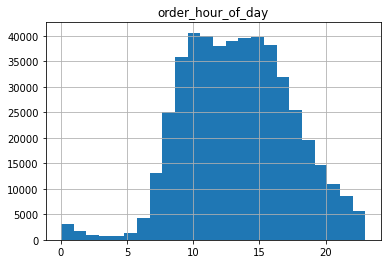

In [37]:
from matplotlib import pyplot as plt
instacart_orders.hist(column='order_hour_of_day', bins=24)
plt.show()

Escribe aquí tus conclusiones

Al parecer, a partir de las 9 horas es donde se evidencia una tendencia mayor a 35000 personas hasta las 16 horas. El pico más grande es a las 10, es decir, donde las personas realizan más órdenes y la horas en donde las personas hacen menos órdenes es entre las 4 y 5.

### [A3] ¿Qué día de la semana compran víveres las personas?

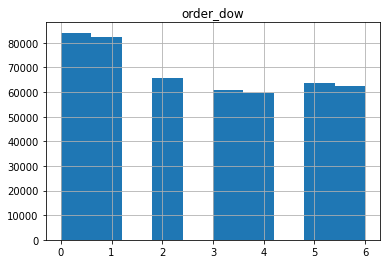

In [38]:
instacart_orders.hist(column='order_dow')
plt.show()

Escribe aquí tus conclusiones

Según la gráfica, los días de la semana en donde más compran víveres son los domingos.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

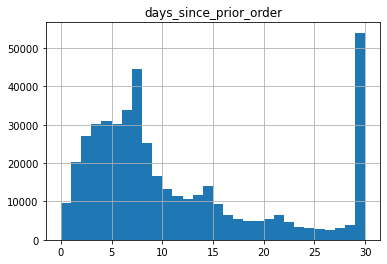

Valor mínimo de días hasta el próximo pedido: 0.0
Valor máximo de días hasta el próximo pedido: 30.0


In [39]:
instacart_orders.hist(column='days_since_prior_order',bins=30)
plt.show()
orders_no_nan = instacart_orders.dropna(subset=['days_since_prior_order'])
min_days = orders_no_nan['days_since_prior_order'].min()
max_days = orders_no_nan['days_since_prior_order'].max()

print("Valor mínimo de días hasta el próximo pedido:", min_days)
print("Valor máximo de días hasta el próximo pedido:", max_days)

Escribe aquí tus conclusiones

Se podría decir que las personas esperan alrededor de 30 días en realizar nuevamente un pedido.Sin embargo al séptimo día también hay un pico, habría que mirar si esto ocurre los fines de semana, debido a que muchas personas descansan y solicitan muchos pedidos.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

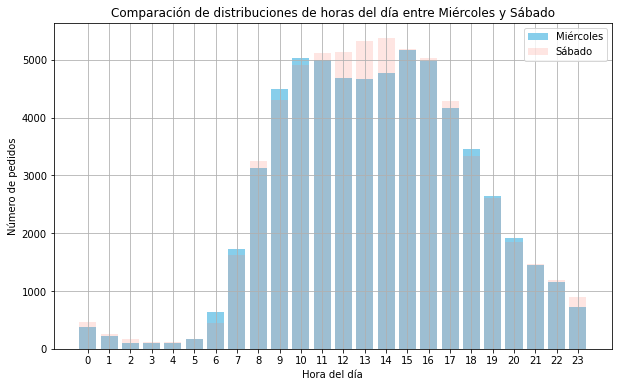

In [40]:
# Filtrar los datos para obtener solo los pedidos realizados los miércoles
wednesday_orders = instacart_orders[instacart_orders['order_dow'] == 3]

# Filtrar los datos para obtener solo los pedidos realizados los sábados
saturday_orders = instacart_orders[instacart_orders['order_dow'] == 6]

# Contar el número de pedidos para cada hora del día en miércoles y sábados
wednesday_hour_counts = wednesday_orders['order_hour_of_day'].value_counts().sort_index()
saturday_hour_counts = saturday_orders['order_hour_of_day'].value_counts().sort_index()
# Crear gráfico de barras comparando las distribuciones de horas del día para miércoles y sábados
plt.figure(figsize=(10, 6))
plt.bar(wednesday_hour_counts.index, wednesday_hour_counts.values, color='skyblue', label='Miércoles')
plt.bar(saturday_hour_counts.index, saturday_hour_counts.values, color='salmon', label='Sábado',alpha=0.2)
plt.title('Comparación de distribuciones de horas del día entre Miércoles y Sábado')
plt.xlabel('Hora del día')
plt.ylabel('Número de pedidos')
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.show()

Escribe aquí tus conclusiones

Se puede decir que los días Sábado se realizan más pedidos entre las 11 y 17 horas en comparación a los pedidos realizados los miércoles. También se puede decir que entre la hora 1 y 5 es el punto en donde menos pedidos se solicitan para ambos días. Adicionalmente, hay una tendencia en ambos días y es que a partir de las 17 horas hasta las 23 horas, disminuye considerablemente el número de pedidos.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [41]:
pedidos_por_cliente = instacart_orders.groupby('user_id')['order_id'].count()

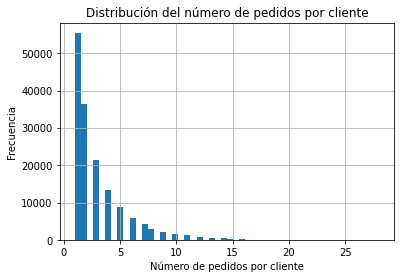

In [42]:
pedidos_por_cliente.hist(bins=50)
plt.xlabel('Número de pedidos por cliente')
plt.ylabel('Frecuencia')
plt.title('Distribución del número de pedidos por cliente')
plt.show()

Escribe aquí tus conclusiones

Aquí se puede ver que la mayoria de clientes solicitan menos de 5 productos, solicitan en mayor medida de 1 a 3 productos.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [43]:
# Fusionar los DataFrames para obtener los nombres de los productos
merged_df = pd.merge(order_products, products, on='product_id')

# Calcular la frecuencia de cada producto añadido al carrito
product_popularity = merged_df['product_id'].value_counts()

# Obtener los 20 productos más populares (ID y nombre)
top_20_popular_products = product_popularity.head(20)
top_20_popular_products = pd.DataFrame(top_20_popular_products).reset_index()
top_20_popular_products.columns = ['product_id', 'popularity_count']

# Fusionar con el DataFrame de productos para obtener los nombres de los productos
top_20_popular_products = pd.merge(top_20_popular_products, products, on='product_id')[['product_id', 'product_name', 'popularity_count']]

# Mostrar los resultados
print(top_20_popular_products)

    product_id              product_name  popularity_count
0        24852                    BANANA             66050
1        13176    BAG OF ORGANIC BANANAS             53297
2        21137      ORGANIC STRAWBERRIES             37039
3        21903      ORGANIC BABY SPINACH             33971
4        47209      ORGANIC HASS AVOCADO             29773
5        47766           ORGANIC AVOCADO             24689
6        47626               LARGE LEMON             21495
7        16797              STRAWBERRIES             20018
8        26209                     LIMES             19690
9        27845        ORGANIC WHOLE MILK             19600
10       27966       ORGANIC RASPBERRIES             19197
11       22935      ORGANIC YELLOW ONION             15898
12       24964            ORGANIC GARLIC             15292
13       45007          ORGANIC ZUCCHINI             14584
14       39275       ORGANIC BLUEBERRIES             13879
15       49683            CUCUMBER KIRBY             136

Escribe aquí tus conclusiones

Aquí se creó la variable 'popularity_count' para almacenar el conteo para cada producto y saber cuáles son los 20 productos más populares, donde se puede observar que los productos orgánicos son los más solicitados por los clientes, esto quiere decir que hay una gran parte de clientes que están consumiendo productos saludables.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [44]:
# Fusionar los DataFrames para obtener los datos necesarios
merged_df = pd.merge(order_products, instacart_orders, on='order_id')

In [45]:
# Agrupar los datos por 'order_id' y contar el número de artículos en cada orden
articulos_por_pedido = merged_df.groupby('order_id')['product_id'].count()

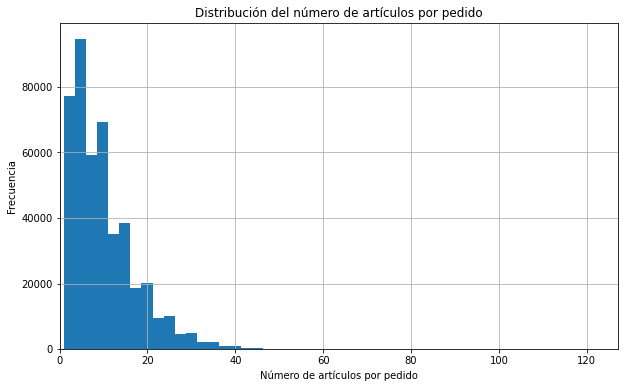

In [46]:
# Graficar la distribución del número de artículos por pedido
plt.figure(figsize=(10, 6))
plt.hist(articulos_por_pedido, bins=50)
plt.title('Distribución del número de artículos por pedido')
plt.xlabel('Número de artículos por pedido')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.xlim(0, max(articulos_por_pedido))
plt.show()

Escribe aquí tus conclusiones

Aquí se puede observar que los clientes compran en mayor proporción menos de 10 productos, el mayor pico se sitúa entre 0 y 10.


### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [47]:
# Fusionar los DataFrames para obtener los nombres de los productos
merged_df = pd.merge(order_products, products, on='product_id')

In [48]:
# Calcular la frecuencia de cada producto que ha sido reordenado
reordered_product_frequency = merged_df[merged_df['reordered'] == 1]['product_id'].value_counts()

In [49]:
# Obtener los 20 productos que se vuelven a pedir con mayor frecuencia
top_20_reordered_products = reordered_product_frequency.head(20)

In [50]:
# Fusionar con el DataFrame de productos para obtener los nombres de los productos
top_20_reordered_products = pd.DataFrame(top_20_reordered_products).reset_index()
top_20_reordered_products.columns = ['product_id', 'reorder_frequency']
top_20_reordered_products = pd.merge(top_20_reordered_products, products, on='product_id')[['product_id', 'product_name', 'reorder_frequency']]

# Mostrar los resultados
print(top_20_reordered_products)

    product_id              product_name  reorder_frequency
0        24852                    BANANA              55763
1        13176    BAG OF ORGANIC BANANAS              44450
2        21137      ORGANIC STRAWBERRIES              28639
3        21903      ORGANIC BABY SPINACH              26233
4        47209      ORGANIC HASS AVOCADO              23629
5        47766           ORGANIC AVOCADO              18743
6        27845        ORGANIC WHOLE MILK              16251
7        47626               LARGE LEMON              15044
8        27966       ORGANIC RASPBERRIES              14748
9        16797              STRAWBERRIES              13945
10       26209                     LIMES              13327
11       22935      ORGANIC YELLOW ONION              11145
12       24964            ORGANIC GARLIC              10411
13       45007          ORGANIC ZUCCHINI              10076
14       49683            CUCUMBER KIRBY               9538
15       28204        ORGANIC FUJI APPLE

Escribe aquí tus conclusiones

Muchos de los productos en la lista son orgánicos, como bananas orgánicas, aguacates orgánicos, espinacas orgánicas para bebés, etc. Esto puede indicar una preferencia creciente de los clientes por productos orgánicos y saludables. Lo anterior sugiere que hay una alta demanda de productos saludables.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [51]:
# Calcular el número total de veces que se pide cada producto
total_ordered_product_frequency = merged_df['product_id'].value_counts()

# Calcular el número de veces que se vuelve a pedir para los 20 productos más solicitados
reordered_products = top_20_reordered_products['product_id'].tolist()
reorder_frequency = merged_df[merged_df['product_id'].isin(reordered_products) & merged_df['reordered'] == 1]['product_id'].value_counts()

# Calcular la proporción de las veces que se pide y que se vuelve a pedir para cada producto
reorder_proportions = reorder_frequency / total_ordered_product_frequency.loc[reorder_frequency.index]

# Fusionar con el DataFrame de productos para obtener los nombres de los productos
reorder_proportions_df = pd.DataFrame(reorder_proportions).reset_index()
reorder_proportions_df.columns = ['product_id', 'reorder_proportion']
reorder_proportions_df = pd.merge(reorder_proportions_df, products, on='product_id')[['product_id', 'product_name', 'reorder_proportion']]

# Mostrar los resultados
print(reorder_proportions_df)

    product_id              product_name  reorder_proportion
0        24852                    BANANA            0.844254
1        13176    BAG OF ORGANIC BANANAS            0.834006
2        21137      ORGANIC STRAWBERRIES            0.773212
3        21903      ORGANIC BABY SPINACH            0.772217
4        47209      ORGANIC HASS AVOCADO            0.793639
5        47766           ORGANIC AVOCADO            0.759164
6        27845        ORGANIC WHOLE MILK            0.829133
7        47626               LARGE LEMON            0.699884
8        27966       ORGANIC RASPBERRIES            0.768245
9        16797              STRAWBERRIES            0.696623
10       26209                     LIMES            0.676841
11       22935      ORGANIC YELLOW ONION            0.701032
12       24964            ORGANIC GARLIC            0.680813
13       45007          ORGANIC ZUCCHINI            0.690894
14       49683            CUCUMBER KIRBY            0.697477
15       28204        OR

In [52]:
# Contar el número total de pedidos para cada producto
total_orders_per_product = merged_df.groupby('product_id')['order_id'].nunique()

# Contar el número de repeticiones de pedidos para cada producto
reordered_orders_per_product = merged_df.groupby('product_id')['reordered'].sum()

# Calcular la tasa de repetición del pedido para cada producto
reorder_rate_per_product = reordered_orders_per_product / total_orders_per_product

# Combinar con el DataFrame de productos para obtener los nombres de los productos
reorder_rate_df = pd.DataFrame({'product_id': reorder_rate_per_product.index, 'reorder_rate': reorder_rate_per_product.values})
reorder_rate_df = pd.merge(reorder_rate_df, products, on='product_id')[['product_id', 'product_name', 'reorder_rate']]

# Mostrar los resultados
print(reorder_rate_df.head(20))

    product_id                                       product_name  \
0            1                         CHOCOLATE SANDWICH COOKIES   
1            2                                   ALL-SEASONS SALT   
2            3               ROBUST GOLDEN UNSWEETENED OOLONG TEA   
3            4  SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...   
4            7                     PURE COCONUT WATER WITH ORANGE   
5            8                  CUT RUSSET POTATOES STEAM N' MASH   
6            9                  LIGHT STRAWBERRY BLUEBERRY YOGURT   
7           10     SPARKLING ORANGE JUICE & PRICKLY PEAR BEVERAGE   
8           11                                  PEACH MANGO JUICE   
9           12                         CHOCOLATE FUDGE LAYER CAKE   
10          13                                  SALINE NASAL MIST   
11          14                     FRESH SCENT DISHWASHER CLEANER   
12          17                                  RENDERED DUCK FAT   
13          18                PIZZ

Escribe aquí tus conclusiones

Aquí hice la proporción de las veces que se pide y que se vuelve a pedir para los 20 productos que se piden con mayor frecuencia y los productos en del DataFrame en general. Para los 20 productos que se piden con mayor frecuencua los productos como bananas, bolsa de plátanos orgánicos, fresas orgánicas, aguacates orgánicos y leche entera orgánica tienen proporciones de reorden relativamente altas, lo que sugiere una alta fidelidad del cliente hacia estos productos. Los clientes tienden a comprarlos repetidamente. Algunos productos, como arándanos orgánicos, limones orgánicos y arándanos orgánicos, tienen proporciones de reorden relativamente más bajas en comparación con otros en la lista. Esto podría indicar que los clientes no los compran con tanta frecuencia como otros productos.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [53]:
# Fusionar los DataFrames para obtener los datos necesarios
merged_df = pd.merge(order_products, instacart_orders, on='order_id')

# Filtrar los datos para incluir solo productos que se han vuelto a pedir
productos_reordenados = merged_df[merged_df['reordered'] == 1]

# Agrupar los datos por cliente y calcular la cantidad total de productos únicos pedidos por cada cliente
productos_totales_por_cliente = merged_df.groupby('user_id')['product_id'].nunique()

# Agrupar los datos filtrados por productos reordenados por cliente y calcular la cantidad de productos únicos reordenados por cliente
productos_reordenados_por_cliente = productos_reordenados.groupby('user_id')['product_id'].nunique()

# Calcular la proporción dividiendo la cantidad de productos reordenados entre la cantidad total de productos
proporcion_repetidos_por_cliente = productos_reordenados_por_cliente / productos_totales_por_cliente

# Mostrar los resultados
print(proporcion_repetidos_por_cliente)

user_id
2         0.040000
4              NaN
5         0.666667
6              NaN
7         0.923077
            ...   
206203    0.222222
206206    0.705882
206207    0.848485
206208    0.612500
206209    0.320000
Name: product_id, Length: 149626, dtype: float64


Escribe aquí tus conclusiones

El resultado muestra la proporción de productos que cada cliente ha vuelto a pedir, donde NaN indica que no hay datos disponibles para ese usuario. Aquí hay algunas conclusiones que se pueden extraer:

Hay una variabilidad en la proporción de productos que los clientes vuelven a pedir. Algunos clientes tienen una alta proporción de productos repetidos, mientras que otros tienen una proporción más baja. Los clientes con una proporción alta tienden a volver a pedir una gran cantidad de productos que ya han comprado antes. Esto podría indicar una mayor lealtad del cliente hacia ciertos productos. Identificar los productos que los clientes suelen volver a pedir podría ayudar a desarrollar estrategias de retención de clientes, como promociones específicas para esos productos o sugerencias personalizadas en la aplicación para fomentar la repetición de pedidos. La presencia de valores NaN indica que no hay suficientes datos disponibles para algunos usuarios. Esto podría ser debido a que son nuevos clientes que aún no han realizado suficientes pedidos para calcular la proporción o a problemas de integridad de los datos que requieren una mayor limpieza y validación. Es importante abordar estos casos para obtener una imagen completa de la repetición de pedidos entre todos los clientes.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [54]:
# Fusionar los DataFrames para obtener los nombres de los productos
merged_df = pd.merge(order_products, products, on='product_id')

In [55]:
# Filtrar los productos que se agregaron primero al carrito (add_to_cart_order == 1)
first_in_cart = merged_df[merged_df['add_to_cart_order'] == 1]

In [56]:
# Contar la frecuencia de cada producto agregado primero al carrito
top_20_first_in_cart = first_in_cart['product_name'].value_counts().head(20)

# Mostrar los resultados
print(top_20_first_in_cart)

BANANA                         15562
BAG OF ORGANIC BANANAS         11026
ORGANIC WHOLE MILK              4363
ORGANIC STRAWBERRIES            3946
ORGANIC HASS AVOCADO            3390
ORGANIC BABY SPINACH            3336
ORGANIC AVOCADO                 3044
SPRING WATER                    2336
STRAWBERRIES                    2308
ORGANIC RASPBERRIES             2024
SPARKLING WATER GRAPEFRUIT      1914
ORGANIC HALF & HALF             1797
LARGE LEMON                     1737
SODA                            1733
ORGANIC REDUCED FAT MILK        1397
LIMES                           1370
HASS AVOCADOS                   1340
ORGANIC REDUCED FAT 2% MILK     1310
HALF & HALF                     1309
ORGANIC YELLOW ONION            1246
Name: product_name, dtype: int64


Escribe aquí tus conclusiones

Basado en los resultados, podemos observar que los productos más comunes que las personas suelen poner primero en sus carritos son principalmente alimentos frescos y básicos, como frutas y verduras orgánicas (como plátanos, aguacates, fresas y espinacas), así como productos lácteos como leche orgánica y mitad y mitad. También se observan elementos de conveniencia, como agua embotellada y refrescos. Esto sugiere que los usuarios tienden a priorizar alimentos frescos y productos esenciales al iniciar sus compras.

### Conclusion general del proyecto:

La conclusión general del proyecto es que, mediante el análisis de los datos proporcionados por Instacart, hemos obtenido una comprensión profunda de los patrones de compra de los clientes, las tendencias de pedido y la popularidad de los productos. Algunas de las conclusiones clave que podemos extraer del proyecto incluyen:

- Patrones de compra por hora y día: Hemos identificado las horas del día y los días de la semana en que los clientes tienden a realizar más pedidos, lo que puede ser útil para la planificación de inventario y la asignación de recursos.
- Comportamiento de repetición de pedidos: Analizamos la frecuencia con la que los clientes vuelven a pedir ciertos productos, lo que sugiere lealtad hacia ciertos artículos y podría ayudar en estrategias de marketing y promoción.
- Popularidad de productos: Identificamos los productos más populares entre los clientes, lo que puede guiar las decisiones de inventario y las estrategias de marketing.
- Número de artículos por pedido: Observamos la distribución del número de artículos por pedido, lo que proporciona información sobre el tamaño típico de los pedidos de los clientes.
- Comportamiento al agregar productos al carrito: Identificamos los productos que los clientes suelen agregar primero a su carrito de compras, lo que puede ser útil para optimizar la presentación de productos en la aplicación o sitio web.

En resumen, el proyecto nos ha permitido comprender mejor el comportamiento de compra de los clientes de Instacart, lo que puede ser valioso para tomar decisiones comerciales informadas y mejorar la experiencia del cliente.